In [1]:
import numpy as np 
import pandas as pd

# Importing Datasets

In [2]:
train_data = pd.read_csv("train_data.txt",sep=':::',engine='python',names=['Title','Genre','Description'])
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
test_data = pd.read_csv("test_data_solution.txt",sep=':::',engine='python',names=['Title','Genre','Description'])
test_data

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
data = pd.concat([train_data,test_data],axis=0)
data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


# Exploratory Data Analysis (EDA)

In [5]:
data.shape

(108414, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108414 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Title        108414 non-null  object
 1   Genre        108414 non-null  object
 2   Description  108414 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [7]:
data.describe()

,Title,Genre,Description
count,108414,108414,108414
unique,108414,27,108067
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,27225,22


In [8]:
data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['Genre'].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

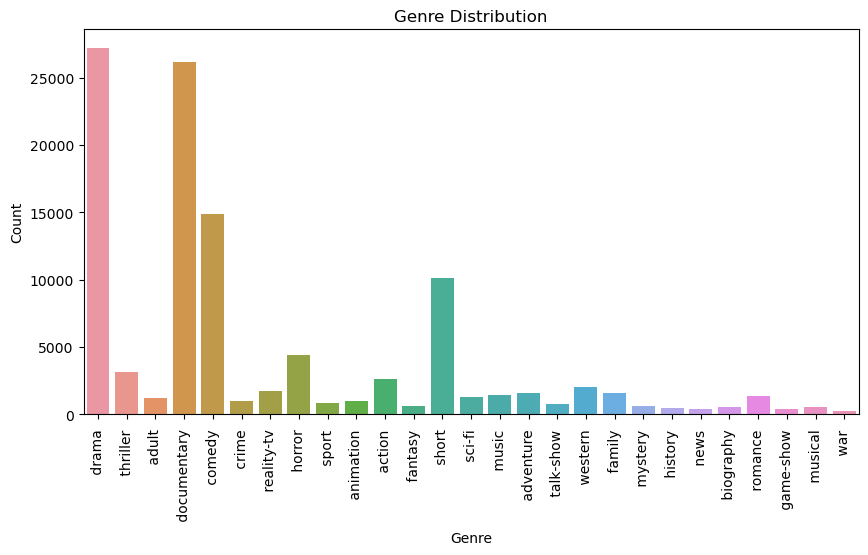

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
value_counts = data['Genre'].value_counts()
labels = value_counts.index.tolist()

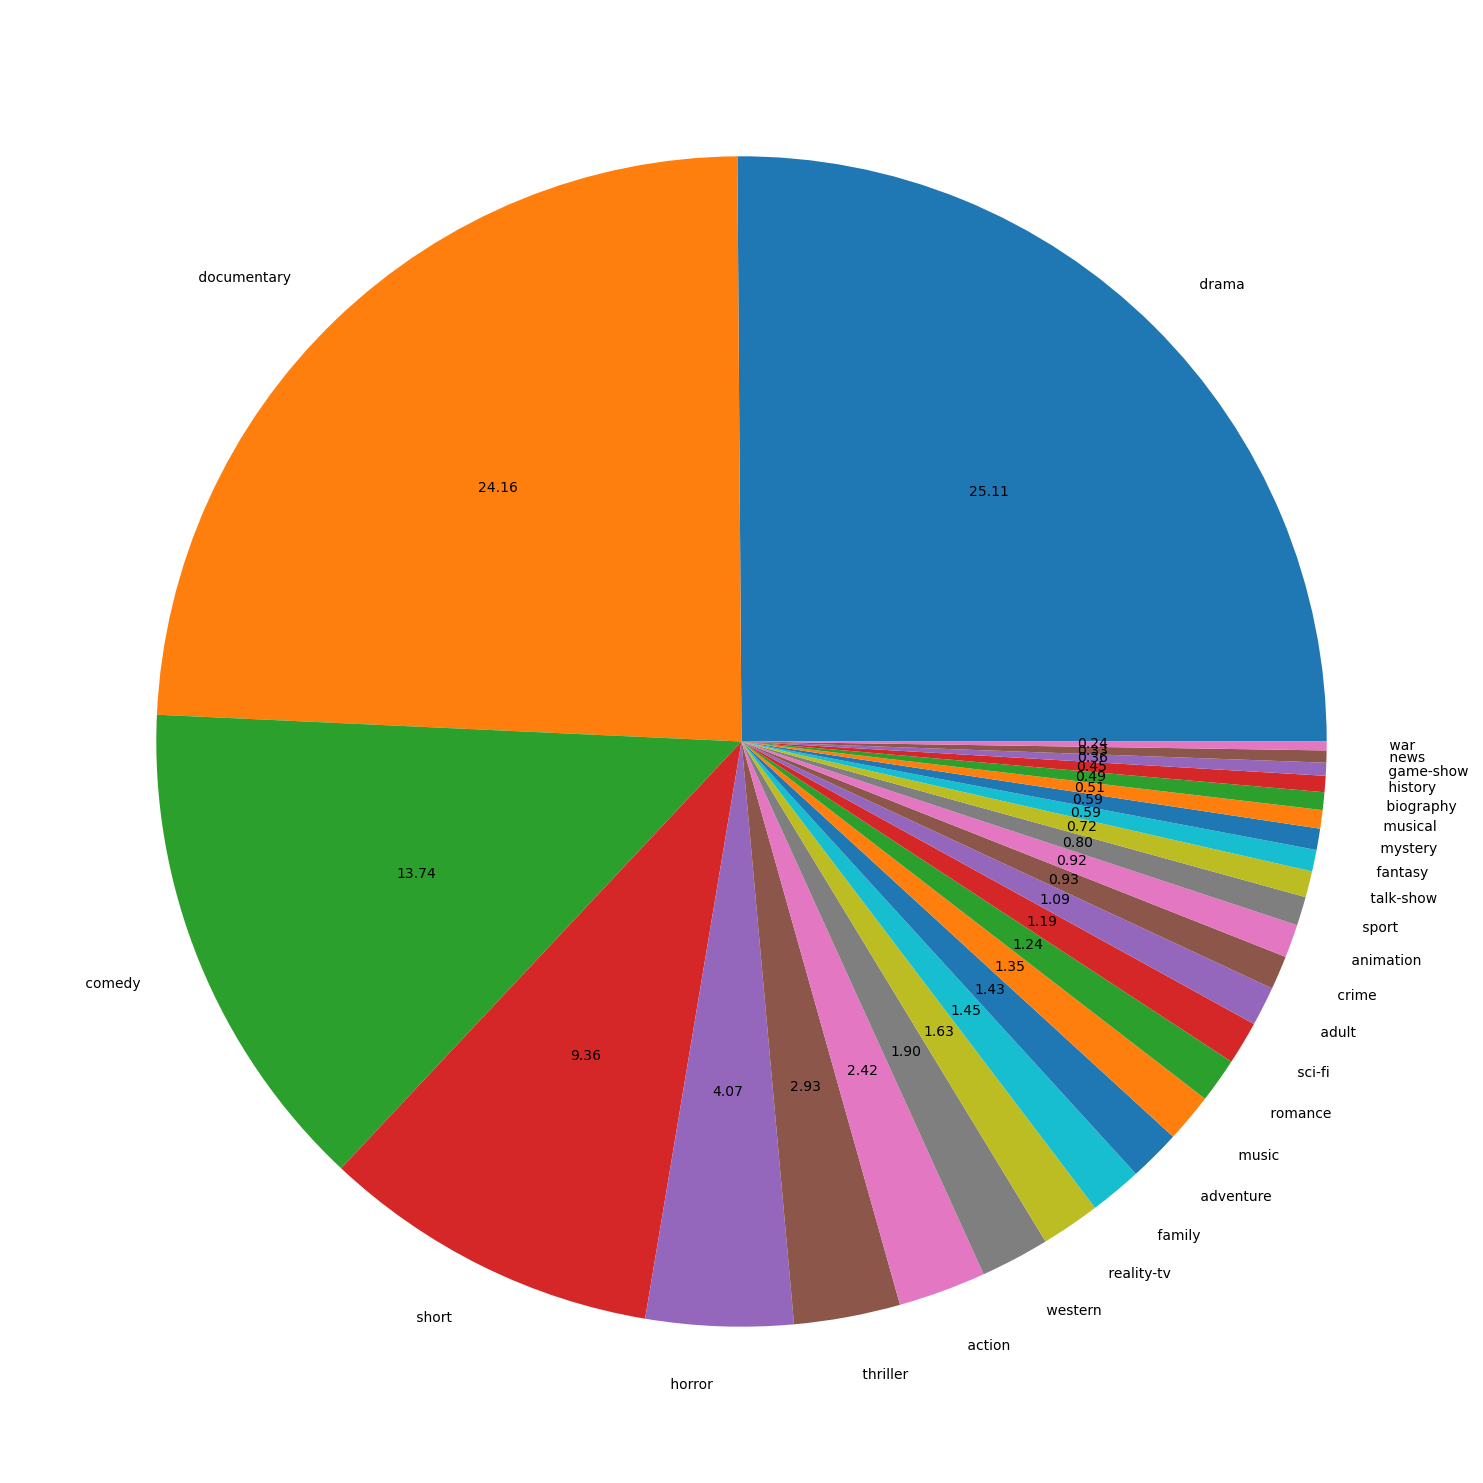

In [14]:
plt.figure(figsize=(19,19))
plt.pie(x=value_counts,labels=labels,autopct='%0.2f')
plt.show()

In [15]:
data['num_char']=data['Description'].apply(len)

In [16]:
data.head()

,Title,Genre,Description,num_char
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


# PREPROCESSING

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [21]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
            
    return " ".join(y)

In [22]:
data['Transform_descriptiob']=data['Description'].apply(transform_text)

In [23]:
data.head()

,Title,Genre,Description,num_char,Transform_descriptiob
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen convers doctor parent oscar learn nobod...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl refer bodi ground zero also state na...


In [24]:
data['num_char_transform']=data['Transform_descriptiob'].apply(len)

In [25]:
data

,Title,Genre,Description,num_char,Transform_descriptiob,num_char_transform
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen convers doctor parent oscar learn nobod...,316
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curre...,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bu empti student field trip museum natur histo...,330
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy father make end meet edith twin ...,664
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl refer bodi ground zero also state na...,340
...,...,...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da...",701,cover multipl genr tale light dark antholog we...,442
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...,367,alic cora munro attempt find father british of...,241
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...,324,movi 169 year make oliv twist art dodger fagin...,167
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard...",386,popular mysteri rock mike mallard askew broadc...,240


In [28]:
data = data.rename(columns=({'Transform_descriptiob':'Transform_description'}))

In [30]:
data

,Title,Genre,Description,num_char,Transform_description,num_char_transform
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listen convers doctor parent oscar learn nobod...,316
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestu relationship curre...,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bu empti student field trip museum natur histo...,330
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy father make end meet edith twin ...,664
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film titl refer bodi ground zero also state na...,340
...,...,...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da...",701,cover multipl genr tale light dark antholog we...,442
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...,367,alic cora munro attempt find father british of...,241
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...,324,movi 169 year make oliv twist art dodger fagin...,167
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard...",386,popular mysteri rock mike mallard askew broadc...,240


# MODEL DEVELOPMENT

In [39]:
x = data['Transform_description']
y = data['Genre']

In [40]:
x.shape

(108414,)

In [41]:
y.shape

(108414,)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [44]:
x = cv.fit_transform(x)

In [45]:
x.shape

(108414, 135601)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
y = le.fit_transform(y)

In [49]:
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [50]:
y

array([ 8, 24,  1, ...,  1,  8,  8])

# SPLIT TRAIN AND TEST DATA

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.0001,solver='liblinear')
lr_model.fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_test,lr_prediction)
print(" accuracy :",accuracy)
report = classification_report(y_test,lr_prediction,zero_division=0)
print(report)

 accuracy : 0.5846054512751926
              precision    recall  f1-score   support

           0       0.51      0.23      0.32       520
           1       0.79      0.21      0.33       243
           2       0.66      0.18      0.29       283
           3       0.57      0.07      0.12       189
           4       0.00      0.00      0.00       109
           5       0.55      0.58      0.57      3008
           6       0.19      0.02      0.03       185
           7       0.66      0.85      0.74      5208
           8       0.52      0.81      0.64      5495
           9       0.61      0.10      0.17       318
          10       0.38      0.02      0.04       148
          11       0.82      0.48      0.60        67
          12       0.00      0.00      0.00        90
          13       0.69      0.55      0.61       889
          14       0.69      0.40      0.51       313
          15       0.33      0.01      0.02       112
          16       0.33      0.03      0.05       

# Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)
nb_prediction = nb_model.predict(x_test)

In [58]:
nb_accuracy = accuracy_score(y_test,nb_prediction)
print(" accuracy :",nb_accuracy)
nb_report = classification_report(y_test,nb_prediction,zero_division=0)
print(nb_report)

 accuracy : 0.5430060415994097
              precision    recall  f1-score   support

           0       0.57      0.12      0.19       520
           1       0.67      0.04      0.08       243
           2       0.69      0.10      0.17       283
           3       1.00      0.01      0.02       189
           4       0.00      0.00      0.00       109
           5       0.53      0.54      0.54      3008
           6       0.00      0.00      0.00       185
           7       0.57      0.87      0.69      5208
           8       0.50      0.79      0.61      5495
           9       0.14      0.01      0.02       318
          10       0.00      0.00      0.00       148
          11       0.93      0.21      0.34        67
          12       0.00      0.00      0.00        90
          13       0.68      0.45      0.54       889
          14       0.70      0.15      0.25       313
          15       0.00      0.00      0.00       112
          16       0.00      0.00      0.00       

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
